In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
burst_list = pd.read_excel('burst_list.xlsx')
burst_list.sample(5)

,date,time,type,instruments,time_start,time_end,date_start,date_end,datetime_start,datetime_end
19535,20221115,11:07-11:07,3,INDIA-OOTY,11:07,11:07,20221115,20221115,2022-11-15 11:07:00,2022-11-15 11:07:00
5450,20220110,06:56-06:57,3,INDIA-OOTY,06:56,06:57,20220110,20220110,2022-01-10 06:56:00,2022-01-10 06:57:00
20442,20221215,07:54-07:59,3,SSRT,07:54,07:59,20221215,20221215,2022-12-15 07:54:00,2022-12-15 07:59:00
16430,20220907,20:26-20:27,3,ALASKA-HAARP,20:26,20:27,20220907,20220907,2022-09-07 20:26:00,2022-09-07 20:27:00
30770,20230613,17:40-17:42,3,ROSWELL-NM,17:40,17:42,20230613,20230613,2023-06-13 17:40:00,2023-06-13 17:42:00


In [4]:
burst_list['duration'] = burst_list['datetime_end'] - burst_list['datetime_start']

In [5]:
# Mean duration of bursts in minutes
(burst_list.duration.dt.total_seconds()/60).describe().astype(int)

count    32469
mean         8
std         63
min       -538
25%          0
50%          1
75%          5
max       1439
Name: duration, dtype: int64

In [6]:
burst_list = burst_list[burst_list.duration.dt.total_seconds() > 0]
burst_list.instruments = burst_list.instruments.str.strip()

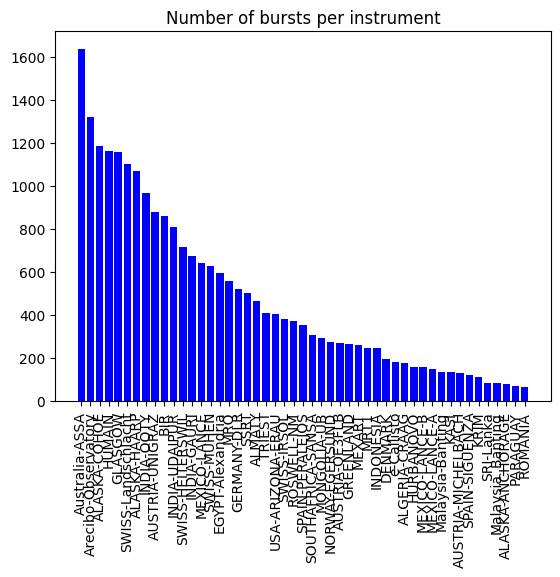

In [7]:
instrument_count = burst_list.instruments.value_counts()
instrument_count = instrument_count[instrument_count > 60]
plt.bar(instrument_count.index, instrument_count.values, color='blue')
plt.xticks(rotation=90)
plt.title('Number of bursts per instrument')
plt.show()

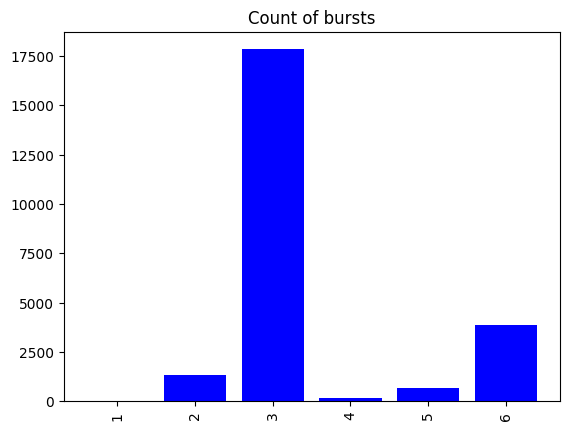

In [8]:
type_count = burst_list.type.value_counts()
plt.bar(type_count.index, type_count.values, color='blue')
plt.xticks(rotation=90)
plt.title('Count of bursts')
plt.show()

<Axes: title={'center': 'Type per top 10 instruments'}, xlabel='instruments'>

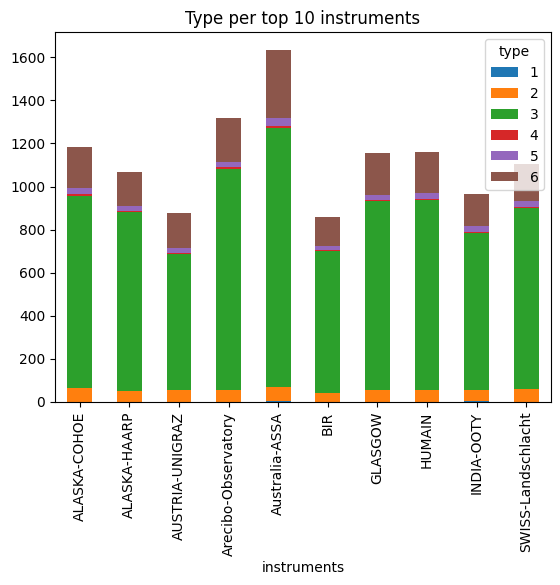

In [9]:
# Type per top 10 instruments
burst_list[burst_list.instruments.isin(instrument_count.index[:10])].groupby(['instruments', 'type']).size().unstack().plot(kind='bar', stacked=True, title='Type per top 10 instruments')

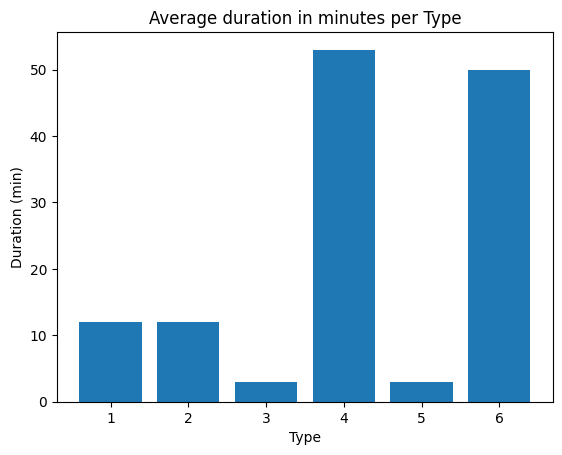

In [10]:
# Average duration per type of burst
avg_duration_type = burst_list.groupby('type').duration.mean().dt.seconds // 60
plt.bar(avg_duration_type.index, avg_duration_type)
plt.xlabel('Type')
plt.ylabel('Duration (min)')
plt.title('Average duration in minutes per Type')
plt.show()

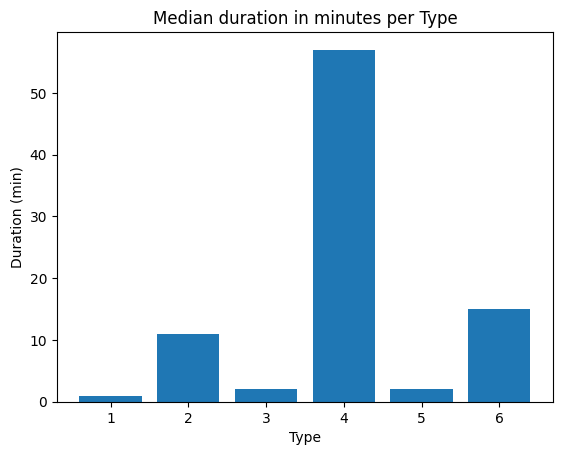

In [11]:
median_duration_type = burst_list.groupby('type').duration.median().dt.seconds // 60
plt.bar(median_duration_type.index, median_duration_type)
plt.xlabel('Type')
plt.ylabel('Duration (min)')
plt.title('Median duration in minutes per Type')
plt.show()